In [2]:
import pydataset as py

mpg = py.data('mpg')
mpg[:3]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [3]:
# 제조사별 도시연비의 평균은?
mpg.groupby('manufacturer')[['cty']].mean()

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [4]:
# 제조사별 도시연비의 최대값과 최소값의 차이는?
mpg.groupby('manufacturer')[['cty']].agg(lambda x:x.max() - x.min())

,cty
manufacturer,
audi,6
chevrolet,11
dodge,9
ford,7
honda,7
hyundai,5
jeep,8
land rover,1
lincoln,1


In [9]:
# cty는 최댓값, hwy는 최소값 구하기
mpg.groupby('manufacturer')[['cty', 'hwy']].agg({'cty': max, 'hwy':min}) 

,cty,hwy
manufacturer,,
audi,21,23
chevrolet,22,14
dodge,18,12
ford,18,15
honda,28,29
hyundai,21,24
jeep,17,12
land rover,12,15
lincoln,12,16


<AxesSubplot:xlabel='manufacturer'>

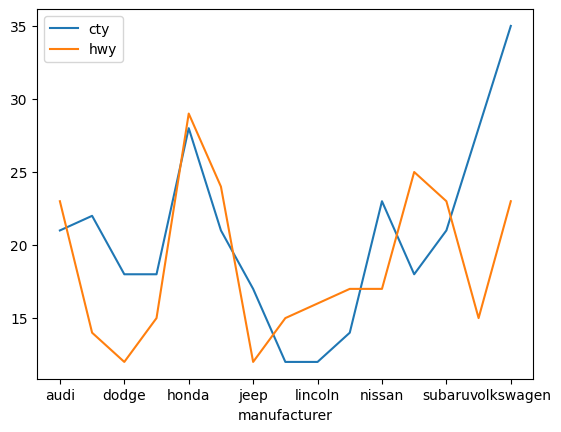

In [11]:
mpg.groupby('manufacturer')[['cty', 'hwy']].agg({'cty': max, 'hwy':min}).plot()

In [3]:
import pydataset as py

mpg = py.data('mpg')
# manufacturer은 모두 몇개임니까?
mpg['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [13]:
# 값이 많은 것들(5개)만 남겨주기
df1 = mpg.query("manufacturer in ['dodge','toyota','volkswagen','ford','chevrolet']") 

# 다른방법
a=['dodge','toyota','volkswagen','ford','chevrolet']
mpg[mpg['manufacturer'].isin(a)]

# 또 다른 방법
top5 = mpg['manufacturer'].value_counts()[:5].index
mpg[mpg['manufacturer'].apply(lambda x: x in list(top5))]

# 또 다른 방법
mpg.query('manufacturer in @top5')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
21,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
23,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
25,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
26,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
27,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
28,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater


In [17]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 데이터 불러오고 변수에 할당하기
iris = load_iris()
X_feature = iris.data
y_label = iris.target

In [18]:
# 표준 정규 분포로 스케일링
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X_feature)

In [19]:
# 2개의 컴포넌트로 LDA 변환
lda = LinearDiscriminantAnalysis(n_components=2)

# PCA는 비지도 학습이지만 LDA는 지도 학습이다
# 따라서 클래스 결정값이 변환시 필요하다
# pca라면 [ pca.fit_transform(X_scaled) ]
iris_lda = lda.fit_transform(X_scaled, y_label)
print(iris_lda.shape)

(150, 2)


In [42]:
# 넘파이의 svd모듈 가져오기
import numpy as np
from numpy.linalg import svd

# 4 4랜덤 행렬 생성
# 랜덤 행렬인 이유 : 개별 로우의 의존성을 없애기 위해
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [44]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape, '\n')
print(f'-----U matrix:\n{np.round(U, 3)}')
print(f'-----Sigma value:\n{np.round(Sigma, 3)}')
print(f'-----V transpose matrix:\n{np.round(Vt, 3)}')

(4, 4) (4,) (4, 4) 

-----U matrix:
[[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
-----Sigma value:
[3.423 2.023 0.463 0.079]
-----V transpose matrix:
[[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [45]:
# Sigma를 다시 (0을 포함한) 대칭 행렬로 변환
Sigma_mat = np.diag(Sigma)
a_1 = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_1, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [46]:
# 세번째 로우는 '첫번째 로우+두번째 로우'로
a[2] = a[0]+ a[1]
# 4번째 로우는 첫번째 로우와 같다고 추가
a[3] = a[0]

In [47]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape, '\n')
print(f'Sigma value:\n{np.round(Sigma, 3)}')

(4, 4) (4,) (4, 4) 

Sigma value:
[2.663 0.807 0.    0.   ]


Text(0, 0.5, 'TruncatedSVDComponent 2')

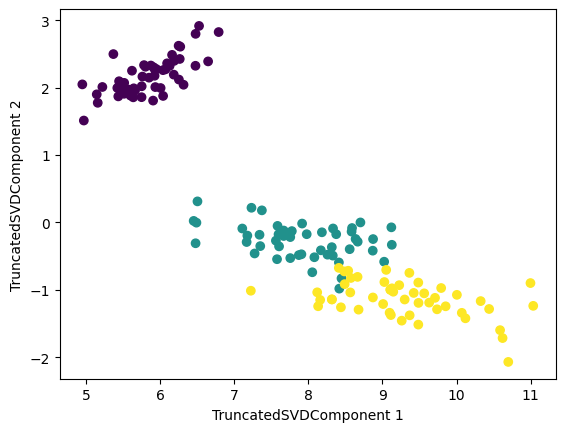

In [23]:
# TruncatedSVD
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X_feature = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(X_feature)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색으로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel("TruncatedSVDComponent 1")
plt.ylabel("TruncatedSVDComponent 2")

Text(0, 0.5, 'TruncatedSVDComponent 2')

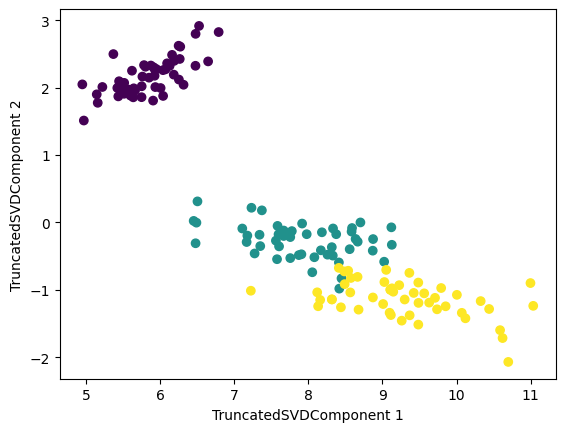

In [26]:
# 표준 정규 분포로 스케일링
X_scaled = StandardScaler().fit_transform(X_feature)

# 스케일링 된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
iris_tsvd_sc = tsvd.fit_transform(X_feature)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색으로 구분
plt.scatter(x=iris_tsvd_sc[:, 0], y=iris_tsvd_sc[:,1], c=iris.target)
plt.xlabel("TruncatedSVDComponent 1")
plt.ylabel("TruncatedSVDComponent 2")

In [25]:
[iris_tsvd_sc == iris_tsvd]
# 시각화만 봤을 때는 꽤 같아 보였는데 완전히 같은건 아니구나

[array([[False, False],
        [False, False],
        [ True, False],
        [ True, False],
        [False, False],
        [ True, False],
        [False, False],
        [ True, False],
        [False, False],
        [False, False],
        [ True, False],
        [ True, False],
        [False, False],
        [ True, False],
        [ True, False],
        [False, False],
        [ True, False],
        [False, False],
        [ True, False],
        [False, False],
        [ True, False],
        [False, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [False, False],
        [False, False],
        [ True, False],
        [ True, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [ True, False],
        [ True, False],
        [False, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, 

Text(0.5, 1.0, 'PCA Transformed')

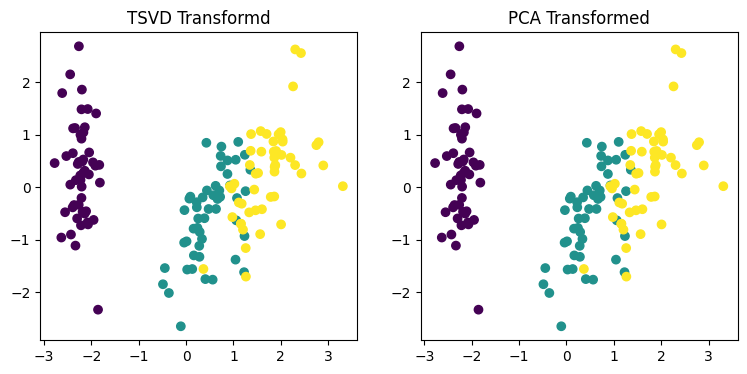

In [100]:
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_feature = iris.data
y_label = iris.target

# 스케일링
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(X_feature)

# 스케일링 된 데이터를 기반으로 TSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_scaled)

# 스케일링 된 데이터를 기반으로 PCA 수행
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# 시각화
# tsvd 변환을 왼쪽에 pca변환으 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('TSVD Transformd')
ax2.set_title('PCA Transformed')

In [115]:
print(np.round((iris_pca - iris_tsvd).mean(), 5))
print((pca.components_ - tsvd.components_).mean())

0.0
2.7755575615628914e-17


In [113]:
# 두 방법의 컴포넌트 차이 평균
var1 = (iris_pca - iris_tsvd).mean()
print(f"{var1:.3f}")

# 원본 피처별 컴포넌트 비율 차이 평균
var2 = (pca.components_ - tsvd.components_).mean()
print(f"{var2:.3f}")

0.000
0.000


In [116]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
iris_data = iris.data

# NMF클래스를 이용하여 사용해보기. 2개의 컴포넌트
nmf = NMF(n_components=2)
# 학습
iris_nmf = nmf.fit_transform(iris_data)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [118]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [117]:
iris_nmf

array([[0.41356229, 0.10457618],
       [0.36548759, 0.14091832],
       [0.37785481, 0.10179942],
       [0.35001275, 0.14891411],
       [0.41596217, 0.09520372],
       [0.42883481, 0.15685741],
       [0.37639076, 0.11399586],
       [0.39328771, 0.13131687],
       [0.332166  , 0.14127353],
       [0.36932356, 0.14435826],
       [0.43656266, 0.11371963],
       [0.375413  , 0.14868511],
       [0.36418392, 0.13035097],
       [0.36111825, 0.06171462],
       [0.50254004, 0.03500042],
       [0.49719808, 0.08127016],
       [0.4591047 , 0.07536144],
       [0.40971235, 0.11364065],
       [0.44059212, 0.16017114],
       [0.42480536, 0.11040591],
       [0.39876724, 0.17807635],
       [0.41340192, 0.12733996],
       [0.42561759, 0.00769626],
       [0.36420305, 0.20863073],
       [0.35271058, 0.20980709],
       [0.35550626, 0.18316918],
       [0.37802034, 0.16981981],
       [0.41114844, 0.12645304],
       [0.41116242, 0.11394863],
       [0.35515239, 0.1629214 ],
       [0.

Text(0, 0.5, 'NMF Component 2')

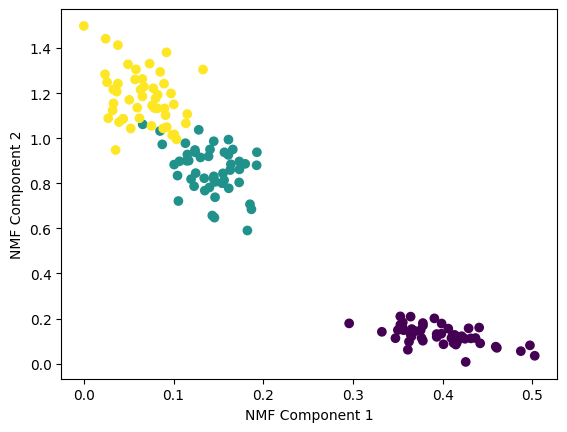

In [120]:
# 시각화
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)

plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

In [ ]:
# K-평균

In [127]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 불러오기 및 DataFrame으로 변환(+컬럼명 변환
iris = load_iris()
X_feature = iris.data
y_label = iris.target

iris_df = pd.DataFrame(data=X_feature, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df[:3]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개의 그룹으로 군집화해보자. k-means는 데이터를 나누는(train_test_split) 과정이 필요하지 않다. 바로 KMeans 사용해보자

In [128]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# 책에서는 kmeans.fit(iris_df)
kmeans.fit(X_feature)

KMeans(n_clusters=3, random_state=0)

fit() 수행시 iris_df 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환되었을 것이다. 속성값을 출력해보면 데이터가 어떤 중심에 속해있는지 알 수 있다고 함

In [129]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

iris_result = iris_df.groupby(['target','cluster']).size()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
dtype: int64

In [130]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

labels_ 값이 0, 1, 2,로 되어있다. iris.data(X_feature)를 줄여서도 확인해보자

In [131]:
pd.Series(kmeans.labels_).value_counts()

0    62
1    50
2    38
dtype: int64

In [133]:
from sklearn.decomposition import PCA

# 붓꽃 데이터 셋의 속성은 4개이므로 2차원 축소한 뒤 보자
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X_feature)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# 책에서는 kmeans.fit(iris_df)
kmeans.fit(iris_pca)
print(pd.Series(kmeans.labels_).value_counts())

2    61
0    50
1    39
dtype: int64


In [134]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

iris_result = iris_df.groupby(['target','cluster']).size()
iris_result

target  cluster
0       0          50
1       1           3
        2          47
2       1          36
        2          14
dtype: int64

In [135]:
from sklearn.datasets import make_blobs

# make_blobs 로 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# target 값 분포
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


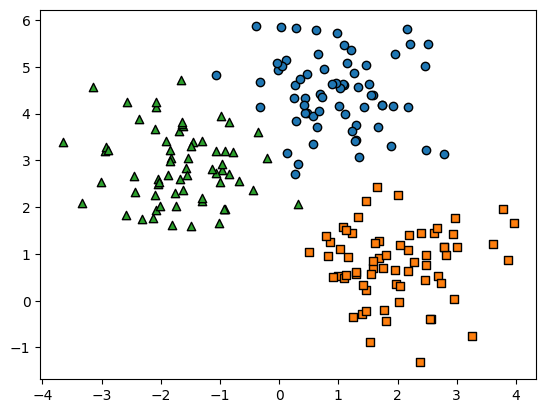

In [136]:
# 데이터 프레임 생성
cluster_df = pd.DataFrame(X, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# target 값 종류
target_list = np.unique(y)

# 가상 데이터 시각화
markers=['o', 's', '^']

for target in target_list:
    target_cluster = cluster_df[cluster_df['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], 
                edgecolor='k', marker=markers[target] )
    
plt.show()

In [137]:
# K-Means 객체 생성
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)

# cluster label (fit 후 labels_, fit_predict의 결과가 같았다.)
cluster_labels = kmeans.fit_predict(cluster_df.iloc[:,:-1])
cluster_df["kmeans_label"] = cluster_labels

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_

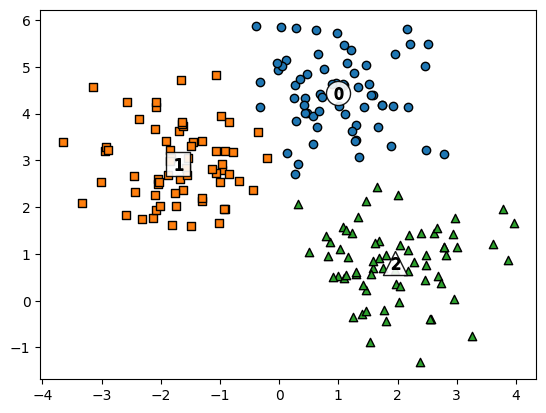

In [138]:
# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']

for cluster in unique_labels:
    
    # 각 군집 시각화
    cluster_v = cluster_df[cluster_df['kmeans_label'] == cluster]    
    plt.scatter(x=cluster_v['ftr1'], y=cluster_v['ftr2'], edgecolor='k', marker=markers[cluster] )
    
    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
                edgecolor='k', marker = f"${cluster}$")
    
    
plt.show()

In [139]:
cluster_df.groupby(['target','kmeans_label']).size()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
dtype: int64

In [48]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표값을 구하기 위한 API
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()

In [49]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# 책에서는 kmeans.fit(iris_df)
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=0)

In [52]:
score_samples = silhouette_samples(iris.data, kmeans.labels_)
print(f'silhouette_samples() return 값의 shpae : {score_samples.shape}')

silhouette_samples() return 값의 shpae : (150,)


In [53]:
# 평균 실루엣 계수 값을 구하기
average_score = silhouette_score(iris.data, kmeans.labels_)
print(f'붓꽃 데이터 세트 Silhouette Analysis Score : {average_score}')

붓꽃 데이터 세트 Silhouette Analysis Score : 0.5528190123564095


`make_blobs`
개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있다. 

In [59]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


<AxesSubplot:>

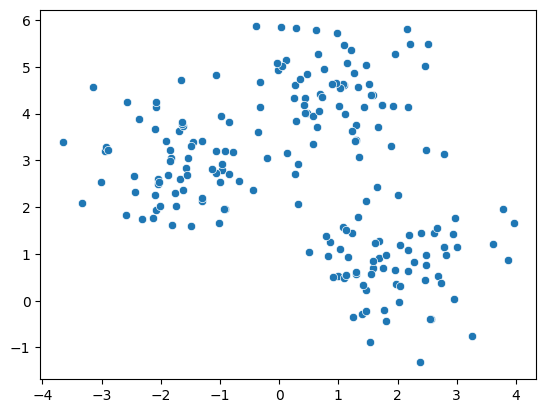

In [61]:
import seaborn as sns

sns.scatterplot(x=X[:,0], y=X[:,1])

In [67]:
target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list :
    target_cluster = y[y == target]
    plt.scatter(x=target_cluster[], y=target_cluster[:,1], edgecolor='k', marker=markers[y])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [77]:
# x를 3개의 군집으로 만들어주세요
kmeans = KMeans(n_clusters=3, random_state=0)
# 책에서는 kmeans.fit(iris_df)
kmeans.fit_transform(X)
kmeans.labels_

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [82]:
# 200 개의 데이터가 각각 몇 번 군집으로 할당 되었는지 나타내주세요
cluser_labels = kmeans.fit_predict(X)
print(pd.Series(cluser_labels).value_counts())

2    68
1    66
0    66
dtype: int64


In [84]:
y[y==2] = 3
y[y==1] = 2
y[y==3] = 1

In [85]:
y

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [86]:
kmeans.labels_ == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [87]:
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
meanshift.fit(X)

MeanShift(bandwidth=0.8)

In [88]:
cluster_labels = meanshift.predict(X)
print(f'cluster labels 유형:{np.unique(cluster_labels)}')

cluster labels 유형:[0 1 2 3 4 5]


In [89]:
print(pd.Series(cluster_labels).value_counts())

1    60
0    57
2    51
3    15
4    10
5     7
dtype: int64


<AxesSubplot:>

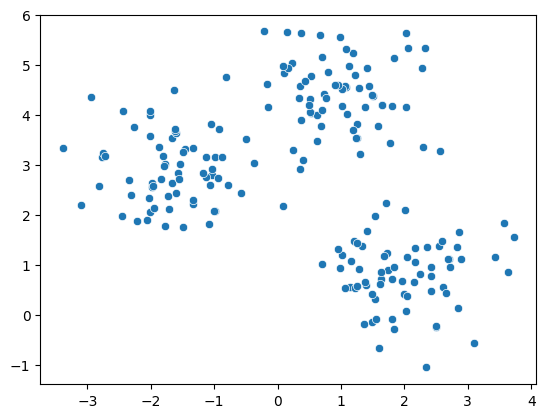

In [90]:
sns.scatterplot(x=X[:,0], y=X[:,1])

In [95]:
kmeans.labels_ == y

array([False,  True,  True, False,  True, False, False, False,  True,
       False,  True, False,  True,  True,  True, False, False, False,
        True, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True,  True, False, False,  True,  True, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False,

In [93]:
# 너무 세분화된 분류로 맞지 않는 값이 많음
# bandwidth값을 작게 할수록 군집 갯수가 늘어나니 살짝 높인 값으로 다시 수행해보자
meanshift = MeanShift(bandwidth=2)
cluster_labels_2 = meanshift.fit_predict(X)

In [96]:
kmeans.labels_

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [102]:
# DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_lables = dbscan.fit_predict(iris.data)
dbscan_lables

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

<AxesSubplot:>

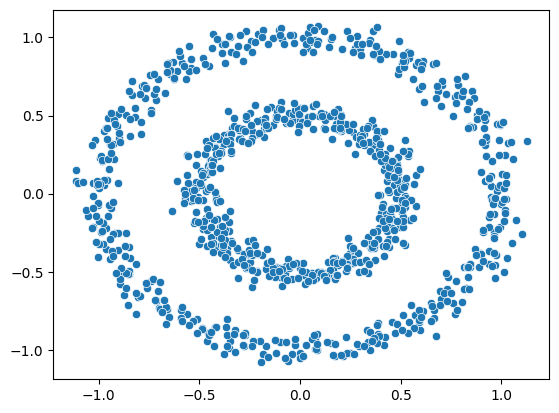

In [106]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
sns.scatterplot(x = X[:,0], y=X[:,1])

In [109]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan.fit_predict(X)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      